In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default/Loan_default.csv


In [2]:
df=pd.read_csv('/kaggle/input/loan-default/Loan_default.csv')

In [3]:
df.shape

(255347, 18)

In [4]:
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


**Understanding distribution of various numerical columns**

In [5]:
df['LoanAmount'].describe()

count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64

In [6]:
df['MonthsEmployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

In [7]:
df['DTIRatio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

In [8]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**There is no null values in any columns**

# Explanatory Data Analysis

# Identifying Credit Score ranges with highest default rate

**Identifying range of credit scores  with highest default rate to frame suitable risk management policy**

In [9]:
df['CreditScore'].describe()

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

**Identifying suitable credit score bins basis the above analysis**


Low Credit Scores (300 - 437):

This range covers the lowest 25% of the data (below the 25th percentile). It likely includes high-risk borrowers, which may have higher default rates.
Bin Name: "Very Poor"
Below Average Credit Scores (437 - 574):

This range covers the credit scores from the 25th percentile to the median. Borrowers here might still be at risk, though somewhat better off than those in the "Very Poor" range.
Bin Name: "Below Average"
Average Credit Scores (574 - 712):

This range covers scores from the median to the 75th percentile. Borrowers with credit scores in this range are more likely to have an average risk of default.
Bin Name: "Average"
High Credit Scores (712 - 849):

This range covers the top 25% of credit scores, including the highest credit scores. Borrowers here are considered low-risk and likely have lower default rates.
Bin Name: "Good"

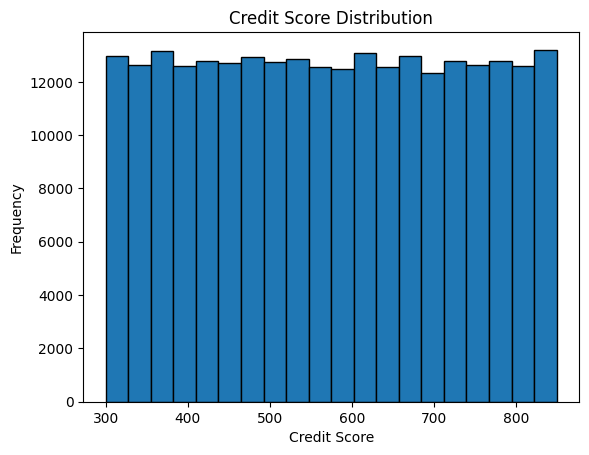

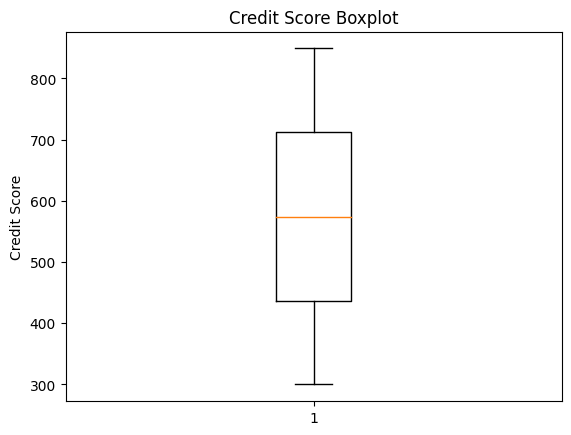

In [10]:
import matplotlib.pyplot as plt

# Plot Histogram
plt.hist(df['CreditScore'], bins=20, edgecolor='black')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot for visualizing quartiles and outliers
plt.boxplot(df['CreditScore'])
plt.title('Credit Score Boxplot')
plt.ylabel('Credit Score')
plt.show()


**Create bins of credit score and indentify default rate in each bins**

In [11]:
bins = [300,437,574,712,849]
bin_labels = ['Very Poor', 'Below Average', 'Average', 'Good']

df['CreditScoreBin']  = pd.cut(df['CreditScore'], bins=bins, labels=bin_labels,right=True)

default_rate_by_bin = df.groupby('CreditScoreBin')['Default'].mean()*100

print(default_rate_by_bin)


CreditScoreBin
Very Poor        13.037263
Below Average    11.894425
Average          11.290222
Good             10.197141
Name: Default, dtype: float64


/tmp/ipykernel_30/3522914662.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_bin = df.groupby('CreditScoreBin')['Default'].mean()*100


**Thus, we can come to an conclusion as credit score increases the default rate decreases which is in resembleance with real world scenarios**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

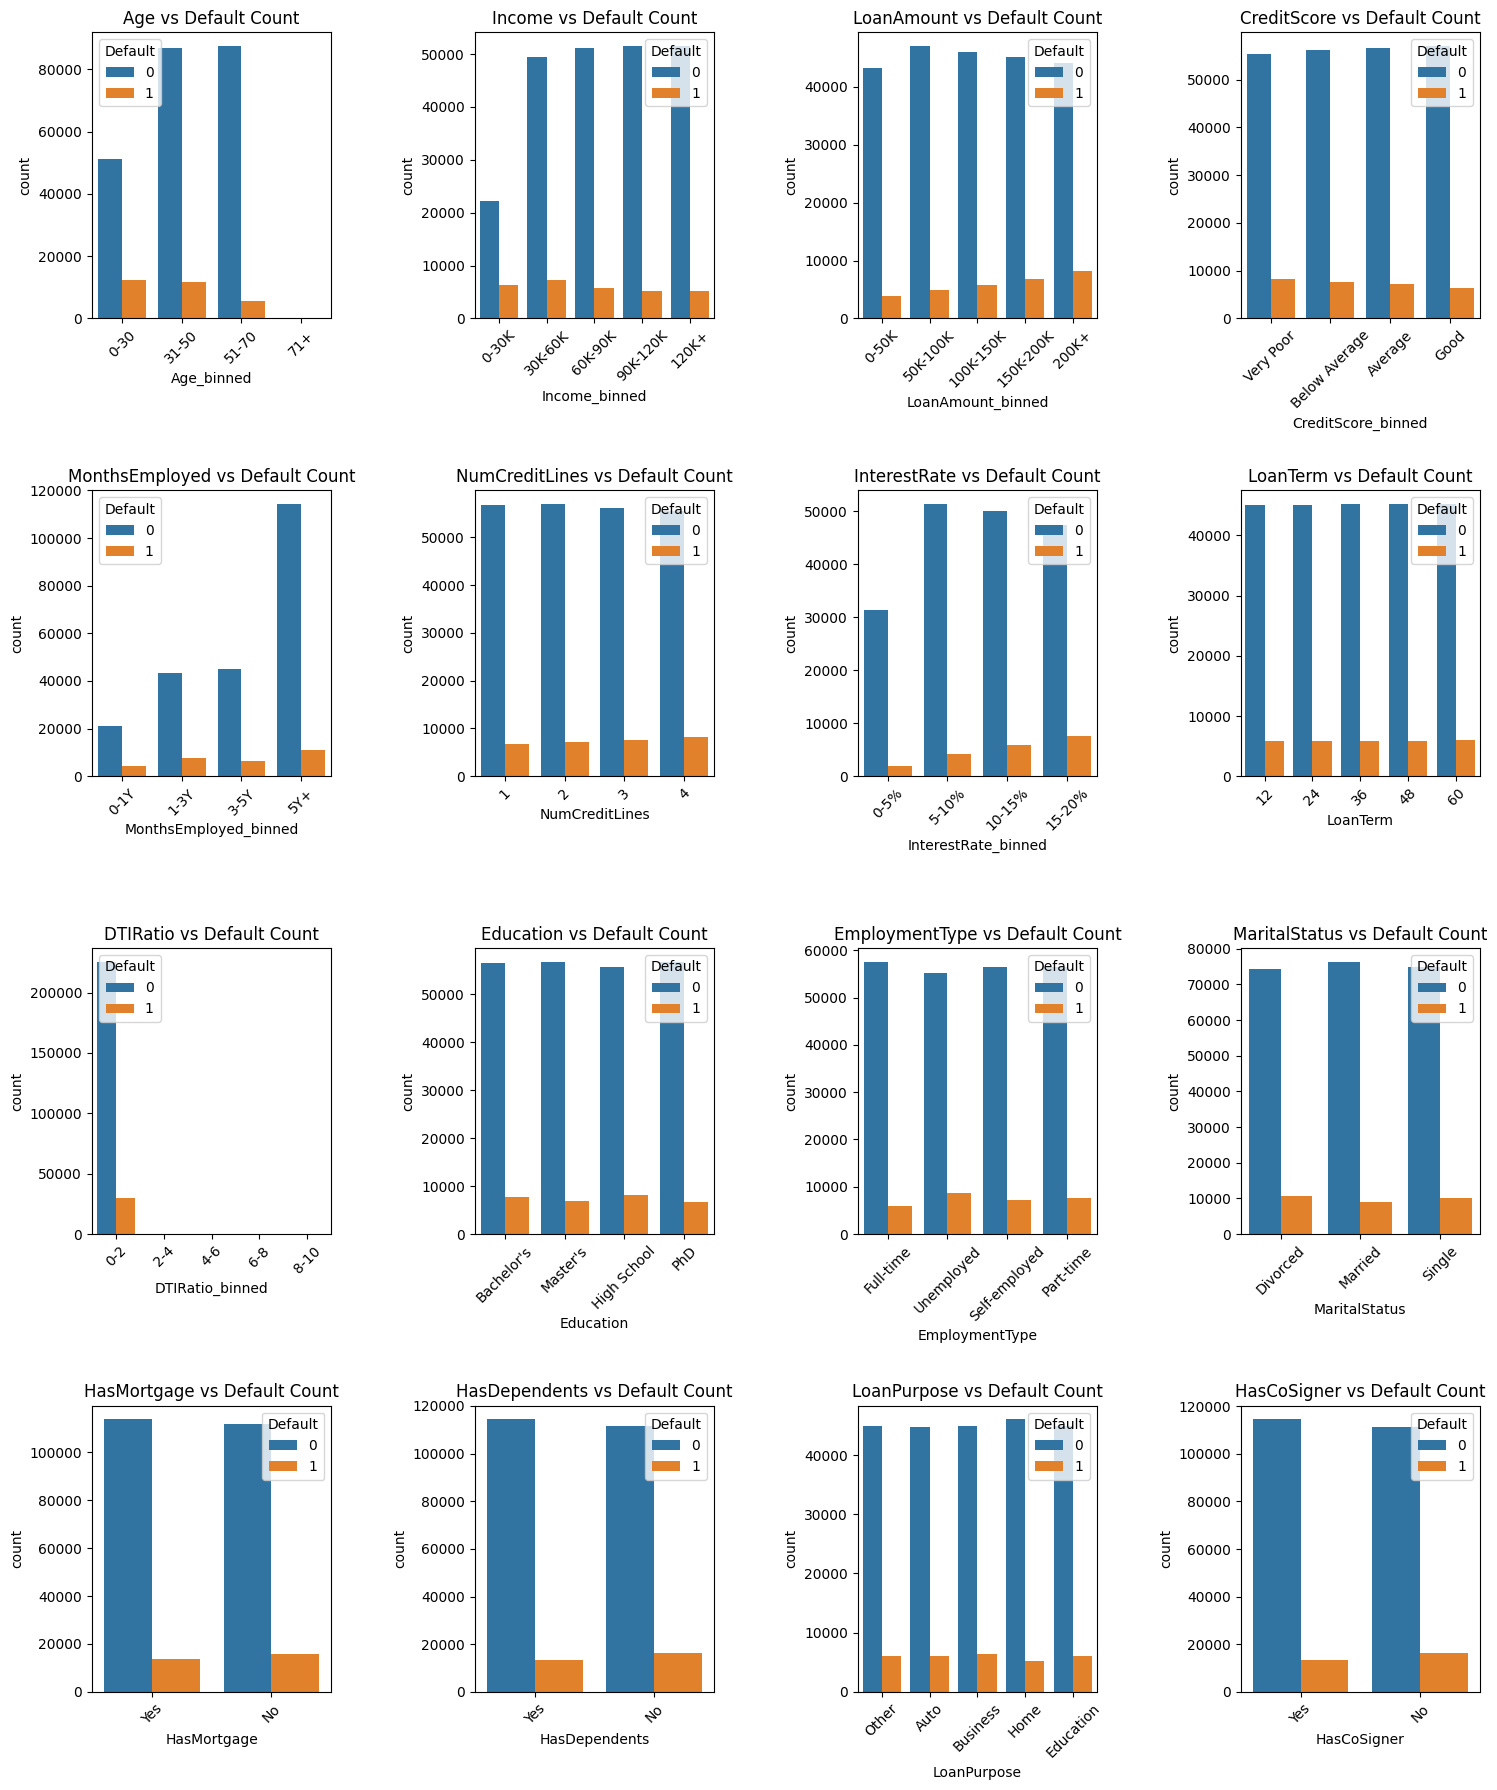

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting setup
plt.figure(figsize=(15, 18))

# Define numerical columns to bin
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Create subplots for numerical features with more appropriate binning
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Adjusted grid layout to 4x4
    # Bin the numerical features for clarity
    if feature == 'Age':
        bins = [0, 30, 50, 70, 100]
        labels = ['0-30', '31-50', '51-70', '71+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'Income':
        bins = [0, 30000, 60000, 90000, 120000, 150000]
        labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'LoanAmount':
        bins = [0, 50000, 100000, 150000, 200000, 250000]
        labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'CreditScore':
        bins = [300,437,574,712,849]
        labels = ['Very Poor', 'Below Average', 'Average', 'Good']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'MonthsEmployed':
        bins = [0, 12, 36, 60, 120]
        labels = ['0-1Y', '1-3Y', '3-5Y', '5Y+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'DTIRatio':
        bins = [0, 2, 4, 6, 8, 10]
        labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'InterestRate':
        bins = [0, 5, 10, 15, 20]
        labels = ['0-5%', '5-10%', '10-15%', '15-20%']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    else:
        sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs Default Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create subplots for categorical features
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for i, feature in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(4, 4, i)  # Continue the grid layout with the same adjusted size (4x4)
    sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs Default Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to add space between plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.6) 
plt.show()

**Interpretation**

1. As loan amount increases, the cases for default increases.
2. As credit score improves, count for default decreases.
3. In employment type, unemployed people have highest number of default cases.
4. As interest rate increases, count for default also increases.
5. As count of no. of credit lines increases, default count increases.

In [13]:
# Drop all columns that end with '_binned' as created in above code
df = df.drop(columns=[col for col in df.columns if col.endswith('_binned')])

df = df.drop(columns =['CreditScoreBin','LoanID'])


# Chi-square test


**The Chi-Square test helps identify whether there is a significant association between two categorical variables. This can guide feature selection and reveal important relationships between the predictors and the target variable.**

In [14]:
import scipy.stats as stats

categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 
                        'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

chi_square_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Default'])

    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    chi_square_results[feature] = {'Chi-Square Statistic': chi2_stat,
                                   'P-value': p_value,
                                   'Degrees of Freedom': dof}

for feature, result in chi_square_results.items():
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {result['Chi-Square Statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print('-' * 40)

for feature, result in chi_square_results.items():
    if result['P-value'] < 0.05:
        print(f"Feature {feature} is significant (P-value < 0.05), indicating an association with Default.")
    else:
        print(f"Feature {feature} is not significant (P-value >= 0.05), no association with Default.")


Feature: Education
Chi-Square Statistic: 214.01898255592704
P-value: 3.9404864175508716e-46
Degrees of Freedom: 3
----------------------------------------
Feature: EmploymentType
Chi-Square Statistic: 529.7449284156027
P-value: 1.7066378020433154e-114
Degrees of Freedom: 3
----------------------------------------
Feature: MaritalStatus
Chi-Square Statistic: 200.3611356065489
P-value: 3.105504830442356e-44
Degrees of Freedom: 2
----------------------------------------
Feature: HasMortgage
Chi-Square Statistic: 133.25200560751577
P-value: 7.96338322455275e-31
Degrees of Freedom: 1
----------------------------------------
Feature: HasDependents
Chi-Square Statistic: 306.8506093007918
P-value: 1.0600086119645882e-68
Degrees of Freedom: 1
----------------------------------------
Feature: LoanPurpose
Chi-Square Statistic: 127.93422475687699
P-value: 1.0767865809403042e-26
Degrees of Freedom: 4
----------------------------------------
Feature: HasCoSigner
Chi-Square Statistic: 390.30504637148

**Interpretation**

Top variables like EmploymentType, HasCoSigner, and HasDependents are the strongest predictors of the target variable (Default) based on their Chi-Square statistics.

Lower-ranked variables, like LoanPurpose, while still statistically significant, have weaker associations compared to the top-ranked variables.


# Finding top features contributing to default

# Finding Correlation

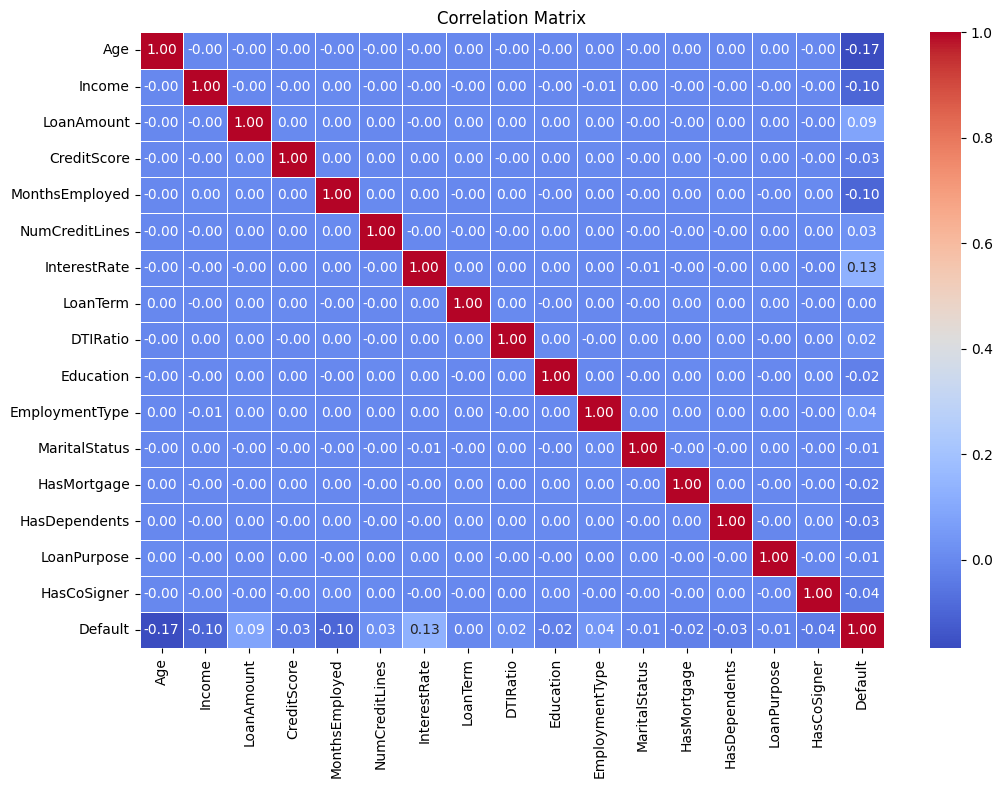

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                       'HasDependents', 'LoanPurpose', 'HasCoSigner']

encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])


correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**Since there is no strong correlation of default with any other variable we will use feature selection using random forest.correlation matrix does not show high absolute correlations among the variables, it means pairwise linear relationships between variables are not significant.**

### Multicollinearity Analysis

**However,Multicollinearity can still exist in the dataset due to complex interactions among more than two variables.** 

**To check the same, we will Check Variance Inflation Factor**



In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Include all numerical variables
X = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]
X = add_constant(X)  # Add intercept for VIF calculation

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Feature        VIF
0           const  51.593006
1             Age   1.000031
2          Income   1.000022
3      LoanAmount   1.000029
4     CreditScore   1.000007
5  MonthsEmployed   1.000022
6  NumCreditLines   1.000008
7    InterestRate   1.000013
8        LoanTerm   1.000016
9        DTIRatio   1.000033


**All variables have VIF values close to 1, which suggests that none of the variables is highly correlated with others.**

# Feature Selection using Random Forest

Top 10 Features Contributing to Default Prediction:
           Feature  Importance
1           Income    0.131455
6     InterestRate    0.125897
2       LoanAmount    0.120491
3      CreditScore    0.103909
0              Age    0.099757
4   MonthsEmployed    0.098170
8         DTIRatio    0.090078
7         LoanTerm    0.038423
14     LoanPurpose    0.037919
5   NumCreditLines    0.031319


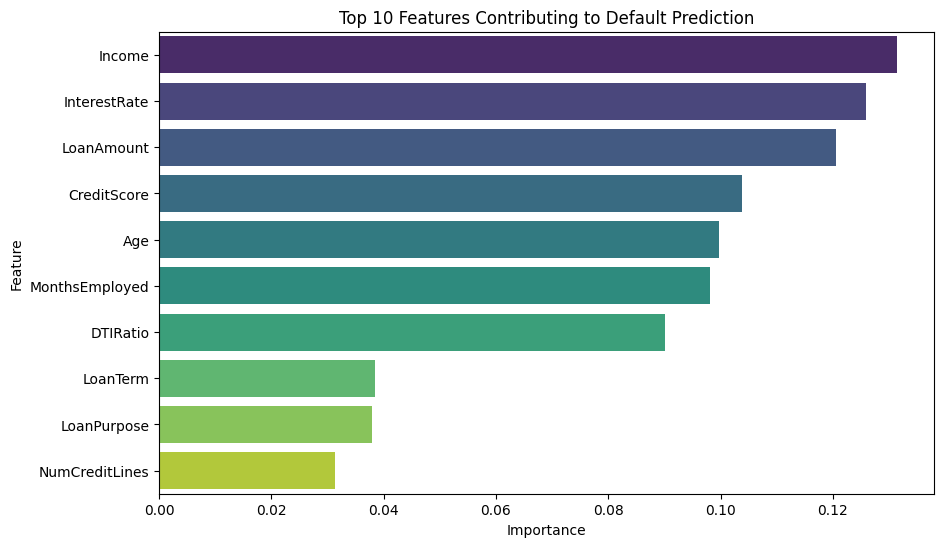

In [17]:
#Separate features and target variable
X = df.drop('Default', axis=1)  
y = df['Default']  


from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=42)
rf.fit(X,y)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
     'Feature': X.columns,
    'Importance': feature_importances  
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("Top 10 Features Contributing to Default Prediction:")
print(features_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature', data=features_df.head(10),palette='viridis')
plt.title('Top 10 Features Contributing to Default Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Conclusion: The top 10 features  listed contribute to the prediction of default according to their importance scores derived from the Random Forest model.**
**Income and Interest Rate are the most influential features, indicating that financial capacity and loan affordability  play a critical role in predicting defaults.**


# Partial Dependence Plot

**Analyzing the Effect of Income on Default Probability**



**In predictive modeling, understanding how individual features influence the target variable is crucial for building interpretable models. One of the most useful tools for this purpose is the Partial Dependence Plot (PDP).**

**A PDP allows us to visualize the relationship between a feature and the predicted outcome, while keeping all other features constant. This can help us interpret the effect of a particular feature on the model's predictions.**

**In this analysis, we'll explore how the Income feature impacts the likelihood of Default in a loan dataset, using a Random Forest Classifier model. By visualizing the partial dependence of Income, we can draw conclusions about whether higher income is associated with a higher or lower probability of loan default.**

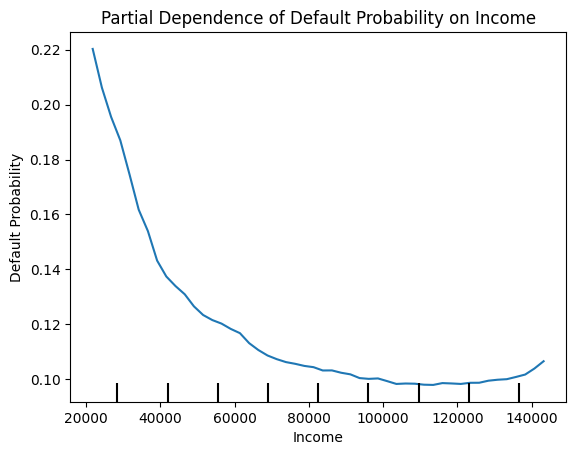

In [18]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Partial Dependence Plot for Income
PartialDependenceDisplay.from_estimator(
    rf, 
    X_train, 
    ['Income'],  
    kind="average", 
    grid_resolution=50  
)

plt.title("Partial Dependence of Default Probability on Income")
plt.ylabel("Default Probability")
plt.xlabel("Income")
plt.show()

**In a Partial Dependence Plot (PDP) where the x-axis represents Income and the y-axis represents the Partial Dependence (which essentially shows the predicted probability of default), the decreasing trend in the graph suggests the following:**


**Partial Dependence:**

**The y-axis (Partial Dependence) indicates the predicted probability of default, independent of the effect of other features. This means how the model predicts the probability of default when income changes, keeping other features constant.**


**Explanation of the Graph:**


**The graph shows a decreasing trend of partial dependence as Income increases. This suggests that, according to the model, higher-income individuals are associated with a lower probability of default, whereas lower-income individuals have a higher probability of default. Essentially, income plays a protective role against default risk, where low-income individuals are more likely to default compared to their high-income counterparts.**

**Partial Dependence on InterestRate**

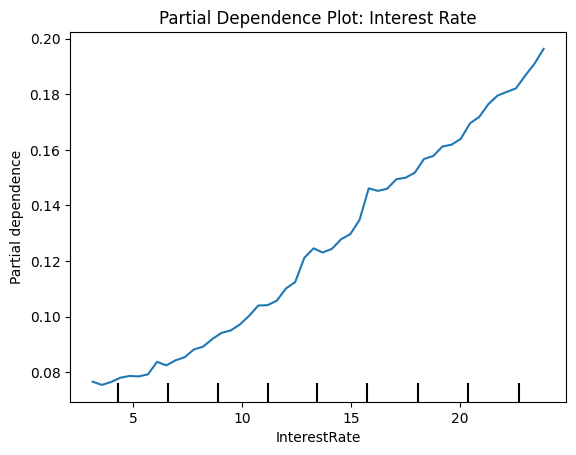

In [19]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Generate PDP for Interest Rate
features = ['InterestRate']
PartialDependenceDisplay.from_estimator(rf, X, features, grid_resolution=50)
plt.title('Partial Dependence Plot: Interest Rate')
plt.show()

**As visible in graph,as interest rate increases, probability of default for customer increases**

# **Polynomial Features-Feature Selection and PDP**

**Now, we will combining the top 5 features we get from Random Forest Feature Selection and create Interaction Terms first then performing Random Forest Forest Feature Selection and PDP on top interaction terms**

In [20]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore']]
y = df['Default']  # Assuming 'Default' is the target column

poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
poly_features = poly.get_feature_names_out(input_features=['Income', 'InterestRate', 'LoanAmount', 'Age', 'CreditScore'])
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_poly_df, y)

feature_importances = pd.DataFrame({
    'Feature': poly_features,
    'Importance': rf.feature_importances_
})

important_features = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importance Ranking:")
print(important_features.head(10))  # Show top 10 important features

# Select only the most important features
selected_features = important_features[important_features['Importance'] > 0.01]['Feature']  # Threshold for importance
X_selected = X_poly_df[selected_features]


Feature Importance Ranking:
                                Feature  Importance
7                            Income Age    0.052277
20               Income Age CreditScore    0.050799
9               InterestRate LoanAmount    0.048430
14                      Age CreditScore    0.045790
1                          InterestRate    0.043716
22  InterestRate LoanAmount CreditScore    0.042113
0                                Income    0.040893
8                    Income CreditScore    0.039739
16              Income InterestRate Age    0.039605
11             InterestRate CreditScore    0.039283


**The feature importance ranking shows the most influential factors in predicting credit risk. Interaction terms like Income Age, Income Age CreditScore, and InterestRate LoanAmount have higher importance, indicating that combined effects of these features significantly impact the model's predictions. Individual features like InterestRate and Income are still notable but less impactful compared to interactions. These insights highlight the importance of considering feature combinations to better capture complex relationships in credit risk modeling.**

**Explanation of the Top 5 Features:**

**Income Age (Importance: 0.052277)**

This interaction suggests that the combined effect of an individual's income and age significantly impacts credit risk. For instance, younger borrowers with higher incomes may be perceived as lower risk compared to older borrowers with the same income level.

**Income Age CreditScore (Importance: 0.050799)**

This three-way interaction indicates that income and age influence credit risk further when combined with the borrower's credit score. A high credit score may mitigate risks associated with lower income or advanced age, while low scores exacerbate these risks.

**InterestRate LoanAmount (Importance: 0.048430)**

The combination of interest rate and loan amount highlights how borrowing costs interact with loan size to affect credit risk. Borrowers taking larger loans at higher interest rates are often at greater risk of default, as the repayment burden is significantly higher.

**Age CreditScore (Importance: 0.045790)**

This interaction reflects how age and credit score jointly influence creditworthiness. Older individuals with high credit scores may have more stable financial behavior, while younger borrowers with lower scores could pose a higher risk.

**InterestRate (Importance: 0.043716)**

As a standalone feature, the interest rate is critical. Higher interest rates increase repayment obligations, which can directly affect the likelihood of default, especially for borrowers with tight financial margins.










### Difference due to Polynomial Feature Selection 

When we have done feature selection using random forest for individual features, income is most features and interest rate stands at second position. But when we have created polynomial features using random forest classifier, InterestRate(0.043716) ranks above Income (0.040893). 

It may be due to following reasons:

1.  Polynomial features introduce interaction terms (e.g., InterestRate * LoanAmount), which can increase the importance of a feature like InterestRate if its interactions strongly impact the target variable (Default).

2. After transformations, importance depends on both individual features and their interactions, not just the original data. This is why rankings can change.

3. Random Forest assigns importance based on how much a feature (or its interactions) helps in reducing prediction error. 









**As done above we can similarily visualize the PDP for these Polynomial features and basis the same more relevant business decisions can be taken**

# Anamoly detection

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


X = df.drop('Default', axis=1)  
y = df['Default']

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['AnomalyScore'] = iso_forest.fit_predict(X)

df['Anomaly'] = df['AnomalyScore'].apply(lambda x:1 if x == -1 else 0)

anomalies = df[df['Anomaly'] == 1]

print("Confusion Matrix:")
print(confusion_matrix(y, df['Anomaly']))
print("\nClassification Report:")
print(classification_report(y, df['Anomaly']))

anomalies = df[df['Anomaly'] == 1]
print("\nSample Anomalies:")
print(anomalies.head())

output_file = "/kaggle/working/anomalies_detected.xlsx"
anomalies.to_excel(output_file, index=False)

print(f"Anomalies exported to {output_file}")



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[203512  22182]
 [ 26300   3353]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    225694
           1       0.13      0.11      0.12     29653

    accuracy                           0.81    255347
   macro avg       0.51      0.51      0.51    255347
weighted avg       0.80      0.81      0.80    255347


Sample Anomalies:
    Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
4    60   20437        9139          633               8               4   
12   41   23265       63527          829              87               4   
28   61   62519       29676          462              16               1   
30   66   39568       58945          604              37               4   
37   68   85409       44772          540             105               1   

    InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  \
4           6.51        48      0.73          0      

**Interpretation**

Confusion Matrix:

True Negatives (TN): 203,512 non-default cases correctly identified.

False Positives (FP): 22,182 non-default cases incorrectly flagged as anomalies.

False Negatives (FN): 26,300 default cases not detected as anomalies.

True Positives (TP): 3,353 default cases correctly identified as anomalies.

Classification Report:

Precision for Class 1 (Default): 13%

Many flagged anomalies are non-default cases.

Recall for Class 1 (Default): 11%

The model misses most of the default cases.

Overall Accuracy: 81%

**Isolation Forest is an unsupervised anomaly detection algorithm. It is not trained on the target class (Default) explicitly, but rather identifies "outliers" based on feature values that appear unusual or "anomalous." Default class is highly imbalanced, with only about 11.6% defaults. In such imbalanced datasets, anomaly detection methods like Isolation Forest can have trouble distinguishing between the majority class (non-defaults) and minority class (defaults).In such case we can make use of One-Class SVM and Autoencoders etc. However  as of now,we haven't done this analysis now**










# **Checking data distribution before Modelling**

In [22]:
# Count of default and non-default cases out of total cases

default_count = df['Default'].sum()
non_default_count = len(df) - default_count

default_percentage = round(default_count/df['Default'].count()*100,2)
non_default_percentage = round(non_default_count/df['Default'].count()*100,2)


print(f"Total Default cases: {default_count}")
print(f"Total non_default cases: {non_default_count}")
print(f"Default percentage:{default_percentage}%")
print(f"Non Default percentage:{non_default_percentage}%")


Total Default cases: 29653
Total non_default cases: 225694
Default percentage:11.61%
Non Default percentage:88.39%


# SMOTE BEFORE MODELLING

**Since data has class imbalance we will use sampling techniques to balance your dataset before modeling**

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X = df.drop("Default", axis =1)
y = df["Default"]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_train, y_train)

#Before resampling
print("Before Resampling:")
print(f"Default cases: {sum(y_train == 1)}")
print(f"Non-Default cases: {sum(y_train == 0)}")

#After resampling
print("\nAfter Resampling:")
print(f"Default cases: {sum(y_resampled == 1)}")
print(f"Non-Default cases: {sum(y_resampled == 0)}")


Before Resampling:
Default cases: 20729
Non-Default cases: 158013

After Resampling:
Default cases: 158013
Non-Default cases: 158013


Now since data is equally distributed we can use this for modelling.

# Modelling

## Logistic Regression With cross validation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)

cv_scores = cross_val_score(log_reg, X_resampled,y_resampled, cv=5, scoring='roc_auc')

log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test)  
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


print("\nLogistic Regression:")
print(f"Cross-validated AUC-ROC scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean()}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC on test set: {roc_auc_score(y_test, y_pred_proba)}")



Logistic Regression:
Cross-validated AUC-ROC scores: [0.73224896 0.71295249 0.71176041 0.71536291 0.74964025]
Mean AUC-ROC: 0.724393003831781
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.21      0.65      0.32      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.67      0.56     76605
weighted avg       0.85      0.68      0.74     76605

AUC-ROC on test set: 0.7289756635180312


**Interpretation:**

Recall for class 1 (Default) is low (0.65). This indicates the model misses many of the positive cases.

Precision for class 1 is also low (0.21), meaning many of the predicted defaults are actually false positives.


### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Random Forest with pruning parameters
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train the Random Forest model
rf.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest:")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC on test set: {roc_auc_score(y_test, y_pred_proba_rf)}")



Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     67681
           1       0.21      0.31      0.25      8924

    accuracy                           0.78     76605
   macro avg       0.56      0.58      0.56     76605
weighted avg       0.82      0.78      0.80     76605

AUC-ROC on test set: 0.6742163025426495


**Interpretation**

The recall for class 1 (Default) is low (0.31). The model misses a large number of actual positive cases (defaults).

The precision for class 1 is also low (0.21), indicating many false positives.


**Initially we does oversampling on our minority dataset(i.e Default cases) using SMOTE and run above ML models on the obtained dataset but result we were getting is not satisfactory.**

**Post that i have also tried undersampling and run ML models on obtained dataset but in that case too results were not satisfactory.**

**Now, we will use SMOTTEEN (combination of undersampling and oversampling) on our dataset and evaluate our model**






### **Random Forest with SMOTTEEN**

In [26]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Adjust decision threshold
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84     21803
           1       0.86      0.93      0.89     30377

    accuracy                           0.87     52180
   macro avg       0.88      0.86      0.86     52180
weighted avg       0.87      0.87      0.87     52180

AUC-ROC: 0.9540075434887428


**Class 0 (Non-default):**

Precision (90%): Out of all predicted non-default cases, 90% were correct.

Recall (78%): The model identified 78% of the actual non-default cases correctly.

F1-Score (84%): This is a harmonic mean of precision and recall, indicating good balance between false positives and false negatives.


**Class 1 (Default):**

Precision (86%): Out of all predicted default cases, 86% were correct.

Recall (93%): The model captured 93% of the actual default cases.

F1-Score (89%): Indicates high reliability in identifying default cases with minimal trade-off between false positives and false negatives.


### **Light GBM with SMOTTEEN**

In [27]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)

y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")


[LightGBM] [Info] Number of positive: 120976, number of negative: 87742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 208718, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     21803
           1       0.93      0.88      0.91     30377

    accuracy                           0.89     52180
   macro avg       0.89      0.90      0.89     52180
weighted avg       0.90      0.89      0.89     52180

AUC-ROC: 0.9570254992976994


**Class 0 (Non-default):**

Precision (85%): Out of all predicted non-default cases, 85% were correctly identified.

Recall (91%): The model successfully identified 91% of the actual non-default cases.

F1-Score (88%): A balanced metric showing good performance in terms of both precision and recall.


**Class 1 (Default):**

Precision (93%): Out of all predicted default cases, 93% were correct.

Recall (88%): The model captured 88% of the actual default cases.

F1-Score (91%): Demonstrates strong reliability in identifying default cases with minimal false negatives or positives.


# Stress Testing & Its Financial Impact (Using Random Forest with SMOTEENN)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

columns_to_keep = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'DTIRatio',
    'MonthsEmployed', 'NumCreditLines', 'Default'
]

df_stress = df[columns_to_keep]


smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(df_stress.drop(['Default'], axis=1), df_stress['Default'])

X_resampled['Default'] = y_resampled

# Increase Loan Amount by 50% and evaluate
X_resampled['LoanAmount_Stress'] = X_resampled['LoanAmount'] * 1.5

# Reduce Credit Scores by 20%
X_resampled['CreditScore_Stress'] = X_resampled['CreditScore'] * 0.8

# Combine both Stress Scenarios
X_resampled['DTIRatio_Stress'] = X_resampled['DTIRatio'] + 0.2

X = X_resampled.drop(['Default'], axis=1)
y = X_resampled['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("Classification Report (Post Stress Testing):")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")

Classification Report (Post Stress Testing):
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     21751
           1       0.83      0.90      0.87     30316

    accuracy                           0.84     52067
   macro avg       0.84      0.83      0.83     52067
weighted avg       0.84      0.84      0.84     52067

AUC-ROC: 0.9198656865717065


### Financial Impact Before and After Stress Testing (in INR)

#### **Loss Given Default (LGD):**
Loss Given Default (LGD) represents the financial loss in case of a default. Let's assume that if a loan defaults, the bank loses 80% of the loan amount.

**Before Stress Testing:**
- **Defaults Detected**: 30,377 (based on recall value of 0.93).
- Average loan amount: ₹50,000.
- **LGD = 30,377 defaults * ₹50,000 loan amount * 80% loss = ₹1.21 billion**.

**After Stress Testing:**
- **Defaults Detected**: 30,316 (based on recall value of 0.90 after stress).
- **LGD = 30,316 defaults * ₹50,000 loan amount * 80% loss = ₹1.21 billion**.
- **Increase in LGD = ₹1.21 billion - ₹1.21 billion = ₹0** (no significant change in defaults detected, but a slight decrease).

---

#### **False Positives (Type I Error):**
False Positives are loans that are predicted to default but are actually safe, leading to a loss of business due to missed opportunities.

**Before Stress Testing:**
- **False Positives**: 3,042 (calculated as 1 - precision of 0.86).
- Average loan amount: ₹50,000.
- **Financial Impact of False Positives = 3,042 * ₹50,000 = ₹152.1 million**.

**After Stress Testing:**
- **False Positives**: 5,084 (calculated as 1 - precision of 0.83 after stress).
- **Financial Impact of False Positives = 5,084 * ₹50,000 = ₹254.2 million**.
- **Increase in False Positives = ₹254.2 million - ₹152.1 million = ₹102.1 million**.

---

#### **False Negatives (Type II Error):**
False Negatives are loans that should have been flagged as risky but weren't, leading to financial losses due to defaults.

**Before Stress Testing:**
- **False Negatives**: 1 - recall of 0.93 = 7% of actual defaults not detected.
- Number of defaults: 30,377.
- **False Negatives = 30,377 * 7% = 2,126**.
- Average loan amount: ₹50,000.
- **Financial Impact of False Negatives = 2,126 * ₹50,000 * 80% LGD = ₹85.04 million**.

**After Stress Testing:**
- **False Negatives**: 1 - recall of 0.90 = 10% of actual defaults not detected.
- Number of defaults: 30,316.
- **False Negatives = 30,316 * 10% = 3,032**.
- **Financial Impact of False Negatives = 3,032 * ₹50,000 * 80% LGD = ₹121.28 million**.
- **Increase in False Negatives = ₹121.28 million - ₹85.04 million = ₹36.24 million**.

---

#### **Summary of Financial Impact (in INR):**

| Metric                             | Before Stress   | After Stress    | Impact Change    |
|------------------------------------|-----------------|-----------------|------------------|
| **Defaults Detected**              | 30,377          | 30,316          | -61              |
| **Loss Given Default (LGD)**       | ₹1.21 Billion   | ₹1.21 Billion   | ₹0               |
| **False Positives (Type I Error)** | ₹152.1 Million  | ₹254.2 Million  | ₹102.1 Million   |
| **False Negatives (Type II Error)**| ₹85.04 Million  | ₹121.28 Million | ₹36.24 Million   |

---

#### **Impact of Stress Testing on Financials:**
- **Increase in Defaults (LGD)**: Stress testing caused **no significant change** in the financial loss due to defaults.
- **Increase in False Positives**: The financial impact of false positives increased by **₹102.1 million** due to more loans being incorrectly flagged as risky.
- **Increase in False Negatives**: The financial impact of false negatives increased by **₹36.24 million**, as more defaults were missed.

---

#### **Total Financial Impact**:
- **Before Stress Testing**: 
  - Total financial loss due to false positives and false negatives = **₹152.1 million + ₹85.04 million = ₹237.14 million**.
  
- **After Stress Testing**: 
  - Total financial loss due to false positives and false negatives = **₹254.2 million + ₹121.28 million = ₹375.48 million**.
  
- **Overall Increase in Financial Impact = ₹375.48 million - ₹237.14 million = ₹138.34 million**.

This shows the **financial impact** of stress testing, indicating an **increase of ₹138.34 million** in potential losses due to more false positives and false negatives under stress scenarios. The **default detection performance** is slightly impacted by the stress test, but the primary financial consequences are from **false positives** and **false negatives**.


# Deployment Code

In [ ]:
# Import necessary libraries
from flask import Flask, request, jsonify
import joblib
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Initialize Flask app
app = Flask(__name__)

# Train the model 
def train_model():
    # Load your dataset from the specified path
    df = pd.read_csv('/kaggle/input/loan-default/Loan_default.csv')

    X = df.drop('target', axis=1)  
    y = df['target']              

    # Apply SMOTEENN for balancing the dataset
    smoteenn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X, y)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train a Random Forest model
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(rf, 'random_forest_model.pkl')

# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Define a route to predict using the model
@app.route('/predict', methods=['POST'])
def predict():
    # Get input from the user (JSON format)
    data = request.get_json(force=True)
    
    # Assuming data is a list of feature values
    features = pd.DataFrame([data['features']])
    
    # Ensure the features have the same shape as the training data
    if features.shape[1] != model.n_features_in_:
        return jsonify({"error": "Incorrect number of features."}), 400

    # Make predictions using the model
    prediction = model.predict(features)
    
    # Return the prediction as JSON
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    

    # Run Flask app
    app.run(debug=True)


# Ethical Considerations in risk modelling

1. **Fairness**: Ensure the model does not discriminate based on race, gender, or other protected characteristics.
     
2. **Transparency**: Clearly explain how the model works and the data used to stakeholders.

   
3. **Data Privacy**: Protect sensitive customer information and comply with data protection laws.  

4. **Bias Mitigation**: Regularly check for and address biases in both data and algorithms.  

5. **Accountability**: Be prepared to explain model decisions and take responsibility for its impacts on individuals and society.
